# Veri Yoğun Uygulamalar Modül Projesi: Zaman Serisi Sınıflandırma Problemi
Dr. İsmail Güzel

Milli Teknoloji Hamlesi kapsamında düzenlenen Yapay Zeka Uzmanlık Programı dahilinde, 18 saatlik Veri Yoğun Uygulamalar Eğitimi sonunda bu projenin tamamlanması beklenmektedir.

In [ ]:
# colab üzerinden drive hesabıma bağlandım

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Proje Başlığı: Hisse Senetlerinin Sektörel Benzerlik Analizi ve Sınıflandırma Modeli Geliştirilmesi**

#### **Proje Amacı:**
Farklı sektörlerdeki hisse senetlerinin zaman serisi davranışlarını analiz ederek, bir hisse senedinin hangi sektöre daha çok benzediğini tespit etmek ve bu bilgiyi yatırım stratejileri için kullanmak.

---

#### **Proje Adımları:**

1. **Veri Toplama:**
   - `yfinance`, `investpy`, `quandl` gibi kütüphaneler kullanılarak, 2005-01-01 tarihinden itibaren aylık getirilere sahip hisse senetleri ve sektör verileri toplanacak.
   - Web scraping ile sektörlerin ve hisse senetlerinin listesi çekilecek.

2. **Veri Ön İşleme:**
   - **Boş Değer Doldurma:** Eksik veriler, ortalama, medyan veya ileri/geri doldurma (forward/backward fill) yöntemleriyle doldurulabilir.
   - **Dönüşüm Kullanma:** Zaman serisi verileri için log dönüşümü, fark alma (differencing) gibi yöntemler uygulanarak verinin durağanlık (stationary) özelliği kazanması sağlanabilir.
   - **Kategorik Değişkenlerle Çalışma:** Sektör bilgisi gibi kategorik değişkenler, one-hot encoding veya label encoding yöntemleriyle sayısal hale getirilebiilir.
   - **Ölçeklendirme:** Zaman serisi verileri ve özellikler, standardizasyon (StandardScaler) veya normalizasyon (MinMaxScaler) yöntemleriyle ölçeklendirilebilir.

3. **Öznitelik Çıkarımı ve Seçme:**
   - **Öznitelik Çıkarımı:** `tsfresh` kütüphanesi ile otomatik özellik çıkarımı yapılacak. Bu süreçte, zaman serisi verilerinden istatistiksel özellikler (ortalama, standart sapma, otokorelasyon vb.) çıkarılacak.
   - **Öznitelik Seçme:** Çıkarılan özellikler arasından en önemlileri seçmek için L1 regularization (Lasso), Recursive Feature Elimination (RFE) veya Principal Component Analysis (PCA) gibi yöntemler kullanılabilir.

4. **Model Geliştirme:**
   - **Model Seçimi:** Scikit-learn, XGBoost ve CatBoost kütüphaneleri kullanılarak Random Forest, Gradient Boosting ve XGBoost modelleri denenerek en iyi performans gösteren model seçilecek.
   - **Hiperparametre Optimizasyonu:** Grid Search veya Bayesian Optimization yöntemleriyle hiperparametre optimizasyonu yapılacak.
   - **Cross-Validation:** Modelin genelleme performansını artırmak için cross-validation yöntemleri kullanılacak.

5. **Model Değerlendirme:**
   - Doğruluk (accuracy), F1-score, ROC-AUC gibi metrikler kullanılarak model performansı değerlendirilecek.
   - Backtesting ile modelin geçmiş veriler üzerindeki performansı test edilebilir, zorunlu değildir.

6. **Sektörel Benzerlik Analizi:**
   - Bir hisse senedinin hangi sektöre daha çok benzediği tespit edilebilir.
   - Örneğin, Real-Estate sektöründeki hisse senetlerinin çoğunlukla hangi sektöre benzediği analiz edilecek.

7. **Bonus: Faktör Hesaplama ve İleri Analiz:**
   - **Faktör Hesaplama:** Model performansı orijinal seri üzerinden yeterli gelmezse, momentum, volatilite, RSI, MACD gibi finansal faktörler hesaplanabilir.
   - **Faktör Zaman Serileri Üzerinden Analiz:** Faktör zaman serileri üzerinden aynı işlemler tekrarlanarak model performansı artırılmaya çalışılabilir. Karşılaştırma yapılabilir.

8. **Sonuçların Görselleştirilmesi ve Raporlama:**
   - Zaman serisi grafikleri, sektörel benzerlik matrisleri ve model performans metrikleri görselleştirilecek.
   - Proje sonuçları detaylı bir rapor halinde sunulacak.

---

#### **Beklenen Çıktılar:**
- Hisse senetlerinin sektörel benzerliklerini gösteren bir sınıflandırma modeli.
- Farklı sektörlerdeki hisse senetlerinin davranışlarını açıklayan bir analiz raporu.
- Yatırım stratejileri için kullanılabilecek sektörel benzerlik bilgisi.

---

#### **Kullanılacak Araçlar ve Teknolojiler:**
- **Programlama Dili:** Python
- **Kütüphaneler:** `yfinance`, `investpy`, `quandl`, `tsfresh`, `scikit-learn`, `XGBoost`, `CatBoost`, `Matplotlib`, `Seaborn`, `Plotly`
- **Veri Kaynakları:** Borsa verileri, sektörel endeksler, finansal API'lar

In [ ]:
# Endüstri bazlı şirketlerin sayılarını ve genel market bilgilerinin çekilip
# görüntülenmesine yardımcı fonksiyonların tanımlanması

import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Veri kazıma işlemleri için gerekli kütüphaneleri kullanarak verilerin web siteleri üzerinden kazınma işlemi

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

In [ ]:
# Fonksiyonlar çağırıldı

sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [ ]:
sectors

Sector Name  Stocks Market Cap Div. Yield  PE Ratio  \
0               Financials    1275     11.95T      0.17%     15.93   
1               Healthcare    1158  8,030.29B      0.50%     61.43   
2               Technology     768     21.80T      0.49%     46.42   
3              Industrials     665  5,943.28B      1.19%     29.54   
4   Consumer Discretionary     560  8,838.91B      0.75%     29.56   
5                Materials     266  2,045.94B      1.70%     27.73   
6              Real Estate     262  1,674.90B      3.83%     49.36   
7                   Energy     251  3,666.03B      3.11%     13.44   
8   Communication Services     248  6,874.83B      1.40%     30.38   
9         Consumer Staples     243  4,260.48B      1.52%     29.91   
10               Utilities     109  1,654.16B      2.72%     21.59   

   Profit Margin 1D Change 1Y Change  
0         19.88%    -0.57%    35.05%  
1          3.08%    -0.20%     9.20%  
2         14.61%     1.47%    43.81%  
3          7.25%     0.79%    25.35%  
4          6.53%     0.79%    35.35%  
5          6.32%     1.00%    14.52%  
6          9.50%     0.08%    12.95%  
7          8.18%     1.89%    14.42%  
8         11.75%     0.64%    37.92%  
9          4.89%     0.79%    27.82%  
10        10.62%     0.92%    38.64%

## Sektör listerine erişmek

Yukarıdaki fonksiyonlar yardımıyla, hangi sembollerin hangi sektörlere ait olduğu bilgisine erişim sağlanabilir ve bu bilgiler ```.csv``` dosyalarına kaydedilebilir. Daha sonra, bu ```.csv``` dosyaları kullanılarak sektör bazlı sembollere ait veriler indirilebilir ve sınıflandırılabilir. Bu süreç, finansal analizlerde sektör bazlı karşılaştırmalar yapmak veya belirli sektörlerdeki trendleri incelemek için oldukça faydalıdır.

In [ ]:
# Verilerin toplanacağı ana klasörün oluşturulması

!mkdir -p /content/drive/MyDrive/datas/stock_sectors

In [ ]:
# Her sektörün verilerinin ayrı ayrı çekilmesi işlemi

fetch_data(sectors='energy').to_csv('/content/drive/MyDrive/datas/stock_sectors/energy.csv')
fetch_data(sectors='financials').to_csv('/content/drive/MyDrive/datas/stock_sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv('/content/drive/MyDrive/datas/stock_sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv('/content/drive/MyDrive/datas/stock_sectors/technology.csv')
fetch_data(sectors='utilities').to_csv('/content/drive/MyDrive/datas/stock_sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv('/content/drive/MyDrive/datas/stock_sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv('/content/drive/MyDrive/datas/stock_sectors/materials.csv')
fetch_data(sectors='technology').to_csv('/content/drive/MyDrive/datas/stock_sectors/technology.csv')
fetch_data(sectors='industrials').to_csv('/content/drive/MyDrive/datas/stock_sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('/content/drive/MyDrive/datas/stock_sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('/content/drive/MyDrive/datas/stock_sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('/content/drive/MyDrive/datas/stock_sectors/communication-services.csv')

In [ ]:
# Örnek olarak finans sektöründeki şirketlerin bastırılması

finance = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/financials.csv')
finance.Symbol

0      BRK.B
1        JPM
2          V
3         MA
4        BAC
       ...  
878     TIRX
879     BTOG
880     LGHL
881     RELI
882     BENF
Name: Symbol, Length: 883, dtype: object

## Veriye Erişmek

Diyelim ki, finans sektöründen **`HSBC`** sembolü için verileri indirmek istiyoruz. Bu işlem için **`yfinance`** kütüphanesini kullanabiliriz. Aşağıdaki adımları takip ederek veriye erişim sağlayabiliriz:

1. **Ticker Nesnesi Oluşturma**: İlk olarak, `yfinance` kütüphanesindeki `.Ticker` fonksiyonunu kullanarak bir obje oluşturabiliriz. Bu obje, ilgili sembolün (örneğin `HSBC`) verilerine erişim sağlar. Ayrıca, bu adımda sembolün doğru olup olmadığını teyit edebiliriz.

2. **Metadata Erişimi**: `.get_history_metadata()` fonksiyonu ile sembolün geçmişine ve diğer temel bilgilerine erişim sağlayabiliriz. Bu, sembolün geçerliliğini ve geçmiş performansını kontrol etmek için faydalıdır.

3. **Tarihsel Veriyi İndirme**: `.history(period='3y')` fonksiyonu ile son 3 yıla ait tarihsel fiyat verilerini indirebiliriz. Bu veri, kapanış fiyatları, hacim, en yüksek ve en düşük fiyatlar gibi bilgileri içerir.

In [ ]:
# Şirketleri daha detaylı incelemek adına yfinance kütüphanesi ile verilerin çekilmesi

import yfinance
ticker_name = yfinance.Ticker("HSBC")
ticker_name.info

{'address1': '8 Canada Square',
 'city': 'London',
 'zip': 'E14 5HQ',
 'country': 'United Kingdom',
 'phone': '44 20 7991 8888',
 'fax': '44 20 7992 4880',
 'website': 'https://www.hsbc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'HSBC Holdings plc provides banking and financial services worldwide. The company operates through Wealth and Personal Banking, Commercial Banking, and Global Banking and Markets segments. The Wealth and Personal Banking segment offers retail banking and wealth products, including current and savings accounts, mortgages and personal loans, credit and debit cards, and local and international payment services; and wealth management services comprising insurance and investment products, global asset management services, investment management, and private wealth 

In [ ]:
# Verinin verisi dediğimiz meta verilerin bastırılması

ticker_name.get_history_metadata()

{'currency': 'USD',
 'symbol': 'HSBC',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 932131800,
 'regularMarketTime': 1739221202,
 'hasPrePostMarketData': True,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 53.86,
 'fiftyTwoWeekHigh': 54.23,
 'fiftyTwoWeekLow': 36.93,
 'regularMarketDayHigh': 54.23,
 'regularMarketDayLow': 53.77,
 'regularMarketVolume': 1812981,
 'longName': 'HSBC Holdings plc',
 'shortName': 'HSBC Holdings, plc.',
 'chartPreviousClose': 51.3,
 'previousClose': 53.1,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1739264400,
   'end': 1739284200,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1739284200,
   'end': 1739307600,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1739307600,
   'end': 1739322000,
   'gmtoffset': -18000}},
 'tradingPeriods':              

In [ ]:
# Verinin alınacak periyodunun belirlenmesi

data=ticker_name.history(period='2y')
data.tail()

Open       High        Low      Close  \
Date                                                                    
2025-02-04 00:00:00-05:00  51.750000  52.130001  51.750000  51.919998   
2025-02-05 00:00:00-05:00  51.880001  52.310001  51.639999  52.209999   
2025-02-06 00:00:00-05:00  52.599998  53.060001  52.599998  52.990002   
2025-02-07 00:00:00-05:00  53.320000  53.430000  53.029999  53.099998   
2025-02-10 00:00:00-05:00  54.130001  54.230000  53.759998  53.860001   

                            Volume  Dividends  Stock Splits  
Date                                                         
2025-02-04 00:00:00-05:00  1021700        0.0           0.0  
2025-02-05 00:00:00-05:00  1052400        0.0           0.0  
2025-02-06 00:00:00-05:00   901700        0.0           0.0  
2025-02-07 00:00:00-05:00  1391600        0.0           0.0  
2025-02-10 00:00:00-05:00  1813100        0.0           0.0

Şimdi ise, belirlenen sembollerin verilerini belirli bir tarihten itibaren çekebiliriz. Daha sonra, bu veriler **tsfresh** paketi kullanımı için uygun bir formata dönüştürülerek, özellik mühendisliği işlemlerine başlanabilir. Ek olarak, verinin kendisiyle oluşturulan model performansını iyileştirmek amacıyla farklı özellik mühendisliği çalışmaları tamamlandıktan sonra, istenilen performansa ulaşılamadığı durumda serinin orijinal değerleri yerine, göstergeler(indicators) üzerinden elde edilen serilerle bir çalışma planlanabilir. Örneğin, aylık getiriler hesaplanabilir. Proje kapsamında bu yöntem, bonus puan olarak değerlendirilecektir.

In [ ]:
# Sınıflandırma yapılacak sektörlerin şirket adlarının çekilme işlemi

finance_data = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/financials.csv').Symbol
healthcare_data = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/healthcare.csv').Symbol
technology_data = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/technology.csv').Symbol

In [ ]:
# İlk beş satırın ve uzunlukların ekrana basma işlemi

print(len(finance_data))
print(len(healthcare_data))
print(len(technology_data))
print(finance_data.head())
print(healthcare_data.head())
print(technology_data.head())

883
1163
768
0    BRK.B
1      JPM
2        V
3       MA
4      BAC
Name: Symbol, dtype: object
0     LLY
1     UNH
2     NVO
3     JNJ
4    ABBV
Name: Symbol, dtype: object
0    AAPL
1    NVDA
2    MSFT
3    AVGO
4     TSM
Name: Symbol, dtype: object


In [ ]:
# Hepsinden 750'şer satır olacak şekilde veri çekme işleminin gerçeklenmesi
# için şirket adlarından örneklerin çekilmesi

import random

finance = finance_data.sample(750)
healthcare = healthcare_data.sample(750)
technology = technology_data.sample(750)

# Teknoloji verisinin içindeki 1 adet NaN değerin düşürülme işlemi

technology = technology.dropna()

3 sektöre ait 750'şer şirketin **'Close'** sütunlarının belirtilen **20** yıllık tarih aralığında çekilme işlemi gerçekleştirildi. Her sektör verisini ayrı ayrı çektiğimden dolayı bunları daha sonra tarih sütunun baz alarak **join**'leme işlemi yaptım ve şirketler sütun şeklinde bir veri formatı elde ettim.
Daha sonrasında ise bu verileri araştrmalarım üzerine direkt tsfresh formatına uygun olacak şekilde çevirme kararı aldım ve **melt** fonksiyonları oluşturarak işlemlerini yaptım. Böylece Date, Symbol, Price ve Sector sütunlarına ulaştım. (Sector sütunu harici olarak modele vermek amaçlı ekstra oluşturulmuştur!)

In [ ]:
# Her sektör için veriler ayrı ayrı çekildi sebebi
# istek kotasının bulunmasıdır. Her sektör sonrası belli bir süre beklendi

ticker_list=technology.tolist()
data = yfinance.download(ticker_list, start='2005-01-01', end='2025-01-01')
data_close=data[['Close']]
data_close.columns = ['_'.join(col) for col in data_close.columns]# MultiIndex to SingleIndex
data_monthly_mom=data['Close'].resample('ME').last().pct_change()+1

[*********************100%***********************]  750 of 750 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['BIO.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 -> 2025-01-01)')
ERROR:yfinance:['BBNX', 'AAPG', 'SION', 'MAZE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104555600, endDate = 1735707600")')
<ipython-input-47-8f86c3e6e8a7>:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_monthly_mom=data['Close'].resample('ME').last().pct_change()+1


In [ ]:
# Günlük ve aylık olarak çektiğim verileri csv formatında drive üzerinde kayıt ettim

data_close.to_csv('/content/drive/MyDrive/datas/stock_sectors/close_technology.csv')
data_monthly_mom.to_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_technology.csv')

In [ ]:
# Her sektör için veriler ayrı ayrı çekildi sebebi
# istek kotasının bulunmasıdır. Her sektör sonrası belli bir süre beklendi

ticker_list=finance.tolist()
data = yfinance.download(ticker_list, start='2005-01-01', end='2025-01-01')
data_close=data[['Close']]
data_close.columns = ['_'.join(col) for col in data_close.columns]# MultiIndex to SingleIndex
data_monthly_mom=data['Close'].resample('ME').last().pct_change()+1

In [ ]:
# Günlük ve aylık olarak çektiğim verileri csv formatında drive üzerinde kayıt ettim

data_close.to_csv('/content/drive/MyDrive/datas/stock_sectors/close_finance.csv')
data_monthly_mom.to_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_finance.csv')

In [ ]:
# Her sektör için veriler ayrı ayrı çekildi sebebi
# istek kotasının bulunmasıdır. Her sektör sonrası belli bir süre beklendi

ticker_list=healthcare.tolist()
data = yfinance.download(ticker_list, start='2005-01-01', end='2025-01-01')
data_close=data[['Close']]
data_close.columns = ['_'.join(col) for col in data_close.columns]# MultiIndex to SingleIndex
data_monthly_mom=data['Close'].resample('ME').last().pct_change()+1

In [ ]:
# Günlük ve aylık olarak çektiğim verileri csv formatında drive üzerinde kayıt ettim

data_close.to_csv('/content/drive/MyDrive/datas/stock_sectors/close_healthcare.csv')
data_monthly_mom.to_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_healthcare.csv')

In [ ]:
data_close.head()

Close_AADI  Close_AAPG  Close_ABBV  Close_ABCL  Close_ABEO  \
Date                                                                     
2005-01-03         NaN         NaN         NaN         NaN     21500.0   
2005-01-04         NaN         NaN         NaN         NaN     21750.0   
2005-01-05         NaN         NaN         NaN         NaN     20812.5   
2005-01-06         NaN         NaN         NaN         NaN     20812.5   
2005-01-07         NaN         NaN         NaN         NaN     20312.5   

            Close_ABP  Close_ABT  Close_ABVC  Close_ABVX  Close_ACCD  ...  \
Date                                                                  ...   
2005-01-03        NaN  14.011140    364430.0         NaN         NaN  ...   
2005-01-04        NaN  13.870038    364430.0         NaN         NaN  ...   
2005-01-05        NaN  13.710917    364430.0         NaN         NaN  ...   
2005-01-06        NaN  14.020144    364430.0         NaN         NaN  ...   
2005-01-07        NaN  14.260323    364430.0         NaN         NaN  ...   

            Close_XYLO  Close_YCBD  Close_YI  Close_ZCMD  Close_ZJYL  \
Date                                                                   
2005-01-03         NaN         NaN       NaN         NaN         NaN   
2005-01-04         NaN         NaN       NaN         NaN         NaN   
2005-01-05         NaN         NaN       NaN         NaN         NaN   
2005-01-06         NaN         NaN       NaN         NaN         NaN   
2005-01-07         NaN         NaN       NaN         NaN         NaN   

            Close_ZLAB  Close_ZOM  Close_ZTEK  Close_ZVSA  Close_ZYME  
Date                                                                   
2005-01-03         NaN        NaN         NaN         NaN         NaN  
2005-01-04         NaN        NaN         NaN         NaN         NaN  
2005-01-05         NaN        NaN         NaN         NaN         NaN  
2005-01-06         NaN        NaN         NaN         NaN         NaN  
2005-01-07         NaN        NaN         NaN         NaN         NaN  

[5 rows x 750 columns]

Bazı değerlendirilmeler yapıldı ve grafikler bastırıldı. Ayrıca aylık bazlı değişimlerin yer aldığı veri seti incelendi ve ayların kapanış günlerinin veri olarak alındığı ve uygulanan fonksiyonlar doğrultusunda bir sonraki aya geçişte yüzdelik değişimlerin baz alındığı görüldü.

In [ ]:
# Basit Hareketli Ortalama (SMA) hesaplama
window = 14
df_SMA= data_close.rolling(window).mean()
df_SMA

Close_AADI  Close_AAPG  Close_ABBV  Close_ABCL  Close_ABEO  \
Date                                                                     
2005-01-03         NaN         NaN         NaN         NaN         NaN   
2005-01-04         NaN         NaN         NaN         NaN         NaN   
2005-01-05         NaN         NaN         NaN         NaN         NaN   
2005-01-06         NaN         NaN         NaN         NaN         NaN   
2005-01-07         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2024-12-24    2.536429         NaN  173.439437    2.875714    5.847143   
2024-12-26    2.589286         NaN  173.653843    2.888571    5.825714   
2024-12-27    2.645714         NaN  173.782629    2.887857    5.797143   
2024-12-30    2.680714         NaN  173.756447    2.878571    5.775000   
2024-12-31    2.735357         NaN  173.900093    2.872143    5.745714   

            Close_ABP   Close_ABT  Close_ABVC  Close_ABVX  Close_ACCD  ...  \
Date                                                                   ...   
2005-01-03        NaN         NaN         NaN         NaN         NaN  ...   
2005-01-04        NaN         NaN         NaN         NaN         NaN  ...   
2005-01-05        NaN         NaN         NaN         NaN         NaN  ...   
2005-01-06        NaN         NaN         NaN         NaN         NaN  ...   
2005-01-07        NaN         NaN         NaN         NaN         NaN  ...   
...               ...         ...         ...         ...         ...  ...   
2024-12-24   1.662857  113.442546    0.508214    7.922857    3.495000  ...   
2024-12-26   1.767143  113.419808    0.509929    7.875000    3.497143  ...   
2024-12-27   1.978571  113.376464    0.515357    7.754286    3.486429  ...   
2024-12-30   2.000000  113.227247    0.521786    7.650714    3.473571  ...   
2024-12-31   2.000714  113.057424    0.530000    7.560714    3.457857  ...   

            Close_XYLO  Close_YCBD  Close_YI  Close_ZCMD  Close_ZJYL  \
Date                                                                   
2005-01-03         NaN         NaN       NaN         NaN         NaN   
2005-01-04         NaN         NaN       NaN         NaN         NaN   
2005-01-05         NaN         NaN       NaN         NaN         NaN   
2005-01-06         NaN         NaN       NaN         NaN         NaN   
2005-01-07         NaN         NaN       NaN         NaN         NaN   
...                ...         ...       ...         ...         ...   
2024-12-24    3.512714    0.401071  0.792143    1.978571    0.802929   
2024-12-26    3.510929    0.392929  0.792143    1.997143    0.836357   
2024-12-27    3.552214    0.386286  0.788571    1.996429    0.859786   
2024-12-30    3.578643    0.379929  0.774286    1.969643    0.865643   
2024-12-31    3.569357    0.376143  0.760000    1.906786    0.867786   

            Close_ZLAB  Close_ZOM  Close_ZTEK  Close_ZVSA  Close_ZYME  
Date                                                                   
2005-01-03         NaN        NaN         NaN         NaN         NaN  
2005-01-04         NaN        NaN         NaN         NaN         NaN  
2005-01-05         NaN        NaN         NaN         NaN         NaN  
2005-01-06         NaN        NaN         NaN         NaN         NaN  
2005-01-07         NaN        NaN         NaN         NaN         NaN  
...                ...        ...         ...         ...         ...  
2024-12-24   27.035000   0.122714    1.022143    1.095357   13.497857  
2024-12-26   26.979285   0.122357    1.007857    1.109571   13.519286  
2024-12-27   26.882143   0.122000    0.996429    1.118857   13.537143  
2024-12-30   26.707857   0.121571    0.985000    1.119571   13.635000  
2024-12-31   26.597857   0.121214    0.973571    1.113929   13.747857  

[5033 rows x 750 columns]

<Axes: xlabel='Date'>

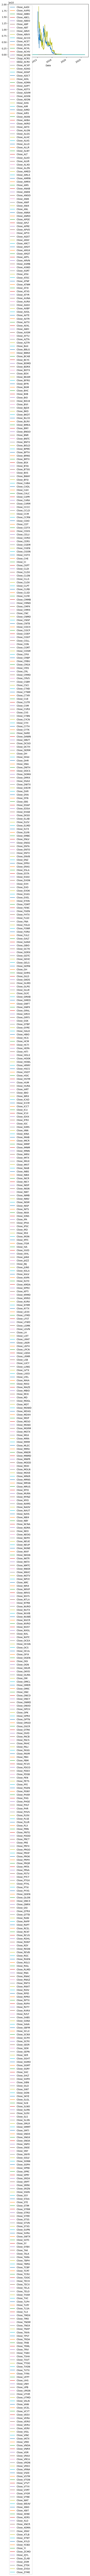

In [ ]:
data_close.plot()

<Axes: xlabel='Date'>

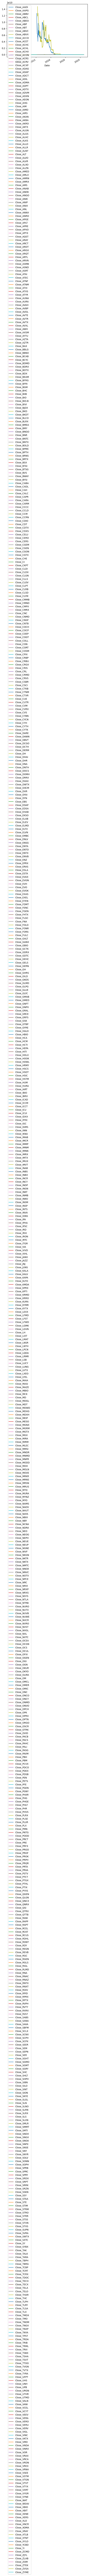

In [ ]:
df_SMA.plot()

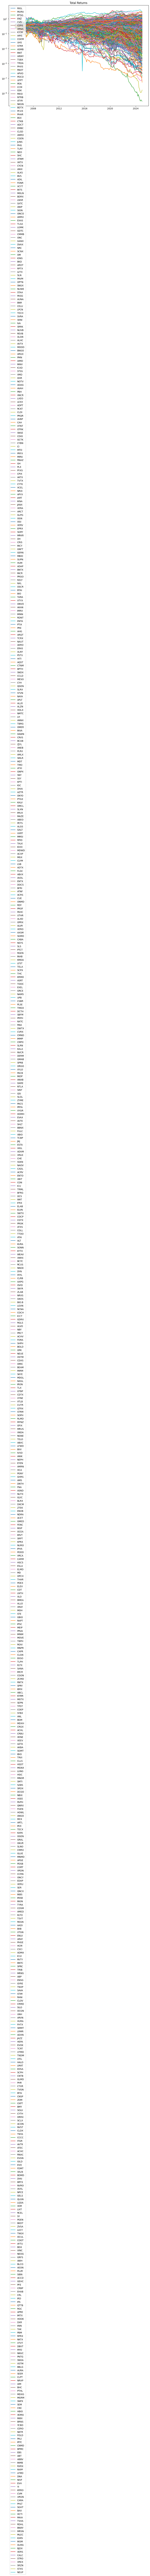

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_monthly_mom[ticker].cumprod(), label = ticker)

plt.yscale('log')
plt.title('Total Returns')
plt.legend()
plt.show()

## Veri Seti Tasarımı ve Profiling-Merge İşlemleri

In [ ]:
data_finance = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_finance.csv')
data_healthcare = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_healthcare.csv')
data_technology = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_technology.csv')

In [ ]:
# Ayrı ayrı boyutlar bastırıldı ki veri kaybı var mı diye bakmak için
print(data_finance.shape)
print(data_healthcare.shape)
print(data_technology.shape)

(240, 751)
(240, 751)
(240, 750)


In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d9af0efeafa452bb4441c9369a9154392c204249839f59b2097ce8defc5781c1
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# Verileri daha iyi analiz edebilme adına profiling yöntemi kullanılarak html
# formatındaki dosyalardan analiz edildi

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport



df_T = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_technology.csv')
profile = ProfileReport(df_T, title="Profiling Report", minimal=True, pool_size=4)
profile.to_file("/content/drive/MyDrive/datas/stock_sectors/profile_T.html")

df_F = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_finance.csv')
profile = ProfileReport(df_F, title="Profiling Report", minimal=True, pool_size=4)
profile.to_file("/content/drive/MyDrive/datas/stock_sectors/profile_F.html")

df_H = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_healthcare.csv')
profile = ProfileReport(df_H, title="Profiling Report", minimal=True, pool_size=4)
profile.to_file("/content/drive/MyDrive/datas/stock_sectors/profile_H.html")

In [ ]:
# Veri analizinden sonra en uygun eşik değerler belirlendi ve daha sonrasında
# eşik değerin %20 olması kararlaştırıldı. Bunun, veriden çok kayıp olmadan ve her
# kategoriden yakın miktarda alacak şekilde olması gibi analizlerle kararı alındı

import pandas as pd

def clean_dataframe(file_path):
    df = pd.read_csv(file_path)
    initial_columns = df.shape[1]  # Başlangıçtaki sütun sayısı
    threshold = 0.80 * len(df)  # Satır sayısının %25'i
    removed_cols = [col for col in df.columns if df[col].isnull().sum() > threshold]  # Çıkarılan sütunlar
    df_cleaned = df.drop(columns=removed_cols)  # %25'ten fazla eksik veri olan sütunları düşür
    removed_columns = len(removed_cols)  # Çıkarılan sütun sayısı
    print(f"{file_path}: {removed_columns} sütun tespit edildi, diğer sütunlar toplam : {df_cleaned.shape[1]}\n")
    print(f"Çıkarılan sütunlar: {removed_cols}\n")
    return df_cleaned

T = clean_dataframe('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_technology.csv')
F = clean_dataframe('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_finance.csv')
H = clean_dataframe('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_healthcare.csv')

/content/drive/MyDrive/datas/stock_sectors/monthly_mom_technology.csv: 213 sütun tespit edildi, diğer sütunlar toplam : 537

Çıkarılan sütunlar: ['AFRM', 'AIP', 'AISP', 'AIXI', 'ALAB', 'ALKT', 'AMPG', 'AMPL', 'APLD', 'APP', 'ARBB', 'ARM', 'ARQQ', 'ASNS', 'ASTI', 'ATCH', 'ATGL', 'AUID', 'AUR', 'AUUD', 'AVDX', 'AXIL', 'AZ', 'BASE', 'BBAI', 'BLND', 'BLZE', 'BMR', 'BNAI', 'BNZI', 'BRZE', 'BTDR', 'CCSI', 'CFLT', 'CGNT', 'CGTL', 'CINT', 'CISO', 'CNTM', 'CORZ', 'CRCT', 'CRDO', 'CSLR', 'CTM', 'CWAN', 'CXAI', 'CXM', 'CYN', 'DATS', 'DAVE', 'DBD', 'DGNX', 'DLO', 'DOCN', 'DUOL', 'DV', 'ELWS', 'ENFN', 'EVCM', 'EXFY', 'EXOD', 'EZFL', 'FAAS', 'FEBO', 'FLYW', 'FOXX', 'FRSH', 'FTCI', 'GAUZ', 'GBTG', 'GCT', 'GCTS', 'GFS', 'GITS', 'GLE', 'GMM', 'GRND', 'GRRR', 'GTLB', 'HCP', 'HKD', 'HKIT', 'HOLO', 'HPAI', 'HTCR', 'HUBC', 'IBTA', 'ICG', 'IDAI', 'IFBD', 'INFA', 'INGM', 'INTA', 'IONQ', 'IOT', 'IZM', 'JDZG', 'JNVR', 'JTAI', 'JZ', 'KARO', 'KD', 'KLTR', 'KSPI', 'KVYO', 'LAES', 'LAW', 'LDTC', 'LGCL', 'LIDR', 'L

In [ ]:
# Bir üst bloktaki analiz sonucunda kararlaştırılan yüzde sonrası tüm veri seti
# 535 satır olacak şekilde alındı

import pandas as pd

def reduce_columns(file_path, target_columns=535):
    df = pd.read_csv(file_path)
    missing_counts = df.isnull().sum()  # Her sütundaki eksik değer sayısını hesapla
    sorted_columns = missing_counts.sort_values(ascending=False).index  # Eksik değerlere göre sırala

    if df.shape[1] > target_columns:
        columns_to_drop = sorted_columns[:df.shape[1] - target_columns]  # Çıkarılacak sütunları seç
        df_cleaned = df.drop(columns=columns_to_drop)  # Sütunları çıkar
        print(f"{file_path}: {len(columns_to_drop)} sütun çıkarıldı, kalan sütun sayısı: {df_cleaned.shape[1]}\n")
        print(f"Çıkarılan sütunlar: {list(columns_to_drop)}\n")
    else:
        df_cleaned = df
        print(f"{file_path}: Sütun sayısı zaten {target_columns} veya daha az, değişiklik yapılmadı.")

    return df_cleaned

# Dosyaları oku ve temizle
T = reduce_columns('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_technology.csv')
F = reduce_columns('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_finance.csv')
H = reduce_columns('/content/drive/MyDrive/datas/stock_sectors/monthly_mom_healthcare.csv')

/content/drive/MyDrive/datas/stock_sectors/monthly_mom_technology.csv: 215 sütun çıkarıldı, kalan sütun sayısı: 535

Çıkarılan sütunlar: ['TTAN', 'MASK', 'YAAS', 'NTCL', 'DGNX', 'PCLA', 'CGTL', 'PONY', 'WCT', 'INGM', 'ZENA', 'TDTH', 'GLE', 'YXT', 'HPAI', 'OS', 'ORKT', 'GAUZ', 'LIF', 'SMTK', 'SVCO', 'JDZG', 'IBTA', 'MFI', 'RBRK', 'LGCL', 'ALAB', 'RYDE', 'UBXG', 'AXIL', 'SMXT', 'YIBO', 'CORZ', 'KSPI', 'SYNX', 'SGN', 'FEBO', 'NATL', 'GMM', 'ATGL', 'ULY', 'KVYO', 'TURB', 'ARM', 'GITS', 'DBD', 'JNVR', 'ODD', 'ELWS', 'CSLR', 'LAES', 'ARBB', 'AIXI', 'SYT', 'IZM', 'ICG', 'HKIT', 'NXT', 'BMR', 'CTM', 'MPTI', 'PERF', 'SATX', 'WLDS', 'XPER', 'NYAX', 'GCT', 'GBTG', 'ASTI', 'FOXX', 'MOB', 'JZ', 'TGL', 'HKD', 'NXTT', 'CNTM', 'LYT', 'SVRE', 'SELX', 'ASNS', 'SOUN', 'OST', 'APLD', 'TOYO', 'MTEK', 'HTCR', 'HUBC', 'VSTE', 'OPTX', 'CRDO', 'CISO', 'RDZN', 'HCP', 'NVNI', 'IOT', 'GCTS', 'ZEO', 'BRZE', 'MSAI', 'EXFY', 'CINT', 'BLZE', 'RZLV', 'MYNA', 'SOPA', 'ENFN', 'AIP', 'KD', 'INFA', 'GTLB', 'JTAI', 'CYN', 

In [ ]:
# En güncel verilerin dosyaları drive'a kaydedildi ki her seferinde
# baştan çalıştırmakla uğraşmamak için

T.to_csv('/content/drive/MyDrive/datas/stock_sectors/T_updated.csv', index=False)
F.to_csv('/content/drive/MyDrive/datas/stock_sectors/F_updated.csv', index=False)
H.to_csv('/content/drive/MyDrive/datas/stock_sectors/H_updated.csv', index=False)

In [ ]:
T.head()

Date  AAOI      AAPL      ACIW      ACLS  ACMR       ACN      ADBE  \
0  2005-01-31   NaN       NaN       NaN       NaN   NaN       NaN       NaN   
1  2005-02-28   NaN  1.166710  1.100753  1.151272   NaN  0.980806  1.085237   
2  2005-03-31   NaN  0.928890  0.990163  0.848837   NaN  0.945205  1.087987   
3  2005-04-30   NaN  0.865371  0.895464  0.850685   NaN  0.898551  0.885366   
4  2005-05-31   NaN  1.102607  1.098890  1.070853   NaN  1.072811  1.113839   

       ADEA       ADI  ...  XTKG  XYZ  YALA  YEXT      ZBRA  ZEPP  ZI  ZM  ZS  \
0       NaN       NaN  ...   NaN  NaN   NaN   NaN       NaN   NaN NaN NaN NaN   
1  1.047301  1.024811  ...   NaN  NaN   NaN   NaN  0.979187   NaN NaN NaN NaN   
2  1.061120  0.984205  ...   NaN  NaN   NaN   NaN  0.952276   NaN NaN NaN NaN   
3  0.614619  0.943830  ...   NaN  NaN   NaN   NaN  1.005685   NaN NaN NaN NaN   
4  1.108016  1.090029  ...   NaN  NaN   NaN   NaN  0.891122   NaN NaN NaN NaN   

   ZUO  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 535 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Verisetlerini Date sütunu üzerinden birleştirme işlemi yapıldı

merged_df = T.merge(F, on='Date', how='outer').merge(H, on='Date', how='outer')

# Sonucu yazdırma
print(merged_df)
print(merged_df.shape)

           Date      AAOI      AAPL      ACIW      ACLS      ACMR       ACN  \
0    2005-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1    2005-02-28       NaN  1.166710  1.100753  1.151272       NaN  0.980806   
2    2005-03-31       NaN  0.928890  0.990163  0.848837       NaN  0.945205   
3    2005-04-30       NaN  0.865371  0.895464  0.850685       NaN  0.898551   
4    2005-05-31       NaN  1.102607  1.098890  1.070853       NaN  1.072811   
..          ...       ...       ...       ...       ...       ...       ...   
235  2024-08-31  1.188482  1.032353  1.164932  0.865295  1.005014  1.034269   
236  2024-09-30  1.260793  1.017467  1.010723  0.959023  1.125277  1.033718   
237  2024-10-31  1.091544  0.969571  0.966601  0.813639  0.925862  0.979471   
238  2024-11-30  2.638925  1.051707  1.154878  0.870238  0.914605  1.050896   
239  2024-12-31  0.894226  1.055155  0.913587  0.941137  0.878418  0.970803   

         ADBE      ADEA       ADI  ...      XTNT   

In [ ]:
534*3+1 # join işlemi sonucu satırların doğrulama işlemi gerçekleştirildi

1603

In [ ]:
# tsfresh'e uygun formata getirme ve birleştirme işlemi yapıldı

import pandas as pd

# Dosyaları oku
_T = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/T_updated.csv')
_F = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/F_updated.csv')
_H = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/H_updated.csv')

# Her dosyaya sector sütunu ekleyelim
_T['sector'] = 'T'
_F['sector'] = 'F'
_H['sector'] = 'H'

# Her dosyayı uygun formatta dönüştürme
def melt_data(df):
    # 'Date' ve hisse sütunlarını 'Date', 'Symbol' ve 'Price' formatına getirme
    melted_df = pd.melt(df, id_vars=['Date', 'sector'], var_name='Symbol', value_name='Price')
    return melted_df

# Her bir dosyayı dönüştür
T_melted = melt_data(_T)
F_melted = melt_data(_F)
H_melted = melt_data(_H)

# Tüm dosyaları birleştir
combined_df = pd.concat([T_melted, F_melted, H_melted], ignore_index=True)

# Sonuç
combined_df.head()

combined_df.to_csv('/content/drive/MyDrive/datas/stock_sectors/combined_df.csv', index=False)

## **Encoding-İmputing-Outliers ve Scaling İşlemleri**

Verimizi artık tsfresh'e uygun bir formata getirdim. Artık yapmam gereken içindeki aykırı değerleri çıkarıp boş hücrelere imputing işlemi yaparak doldurup daha sonrasında standart scaling işlemi yapıp veriyi tsfresh'e en uygun formata getirmektir. Normalizasyon bu tarz ilişkilerde pek uygun olmadığı derslerden çıkarım yapılarak uygulanmamıştır. Ayrıca imputing işlemi için modellerin kullanımı kararlaştırılmış ve 3 farklı model üzerinden analiz yapılmıştır boş değerler.

### Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def encode_data(file_path, output_path):
    # CSV dosyasını oku
    df = pd.read_csv(file_path)

    # Tarih sütunu (ilk sütun) için Ordinal Encoding
    encoder_date = OrdinalEncoder()
    df.iloc[:, 0] = encoder_date.fit_transform(df.iloc[:, [0]])
    print(f"{file_path}: İlk sütundaki tarihler ordinal encoding ile dönüştürüldü.")

    # Symbol sütunu için Label Encoding
    if "Symbol" in df.columns:
        encoder_symbol = LabelEncoder()
        df["Symbol_encoded"] = encoder_symbol.fit_transform(df["Symbol"])
        df.drop(columns=["Symbol"], inplace=True)
        print(f"{file_path}: 'Symbol' sütunu Label Encoding ile dönüştürüldü ve orijinal sütun kaldırıldı.")

    # Sector sütunu için Label Encoding
    if "sector" in df.columns:
        encoder_sector = LabelEncoder()
        df["sector"] = encoder_sector.fit_transform(df["sector"])
        print(f"{file_path}: 'sector' sütunu Label Encoding ile dönüştürüldü.")

    # Dönüştürülmüş veriyi kaydet
    df.to_csv(output_path, index=False)
    print(f"Encoded CSV başarıyla kaydedildi: {output_path}")

# Kullanım
dosya_yolu = "/content/drive/MyDrive/datas/stock_sectors/combined_df.csv"
cikti_yolu = "/content/drive/MyDrive/datas/stock_sectors/encoded_df.csv"
encode_data(dosya_yolu, cikti_yolu)

/content/drive/MyDrive/datas/stock_sectors/combined_df.csv: İlk sütundaki tarihler ordinal encoding ile dönüştürüldü.
/content/drive/MyDrive/datas/stock_sectors/combined_df.csv: 'Symbol' sütunu Label Encoding ile dönüştürüldü ve orijinal sütun kaldırıldı.
/content/drive/MyDrive/datas/stock_sectors/combined_df.csv: 'sector' sütunu Label Encoding ile dönüştürüldü.
Encoded CSV başarıyla kaydedildi: /content/drive/MyDrive/datas/stock_sectors/encoded_df.csv


In [ ]:
535*240*3-720

384480

### İmputing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("/content/drive/MyDrive/datas/stock_sectors/encoded_df.csv")

# Farklı modellerle imputing yapma fonksiyonu
def impute_price_by_symbol(df, model):
    imputer = IterativeImputer(estimator=model, initial_strategy='mean', random_state=0)

    # Her Symbol_encoded için ayrı ayrı işlem yap (Bir nevi şirketlere göre gruplayıp imputing yapmak diyebiliriz)
    df_imputed = df.copy()
    for symbol in df['Symbol_encoded'].unique():
        mask = df['Symbol_encoded'] == symbol
        df_subset = df.loc[mask, ['Price']]

        # Imputer'ı fit ve transform et
        df_imputed.loc[mask, 'Price'] = imputer.fit_transform(df_subset)

    return df_imputed

# Farklı modellerle imputing işlemi
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=0),
    'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=0),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=2)
}

# Sonuçları saklamak için bir dict
imputed_results = {}

for model_name, model in models.items():
    print(f"Imputing using {model_name}...")
    df_imputed = impute_price_by_symbol(df, model)
    imputed_results[model_name] = df_imputed

    # Sonuçları gösterebiliriz
    print(df_imputed.head())

# Örneğin DecisionTreeRegressor sonucu:
print("DecisionTreeRegressor ile imputing sonrası:")
print(imputed_results['DecisionTreeRegressor'])

Imputing using DecisionTreeRegressor...
   Date  sector     Price  Symbol_encoded
0   0.0       2  1.045362               3
1   1.0       2  1.045362               3
2   2.0       2  1.045362               3
3   3.0       2  1.045362               3
4   4.0       2  1.045362               3
Imputing using ExtraTreesRegressor...
   Date  sector     Price  Symbol_encoded
0   0.0       2  1.045362               3
1   1.0       2  1.045362               3
2   2.0       2  1.045362               3
3   3.0       2  1.045362               3
4   4.0       2  1.045362               3
Imputing using KNeighborsRegressor...
   Date  sector     Price  Symbol_encoded
0   0.0       2  1.045362               3
1   1.0       2  1.045362               3
2   2.0       2  1.045362               3
3   3.0       2  1.045362               3
4   4.0       2  1.045362               3
DecisionTreeRegressor ile imputing sonrası:
         Date  sector     Price  Symbol_encoded
0         0.0       2  1.045362     

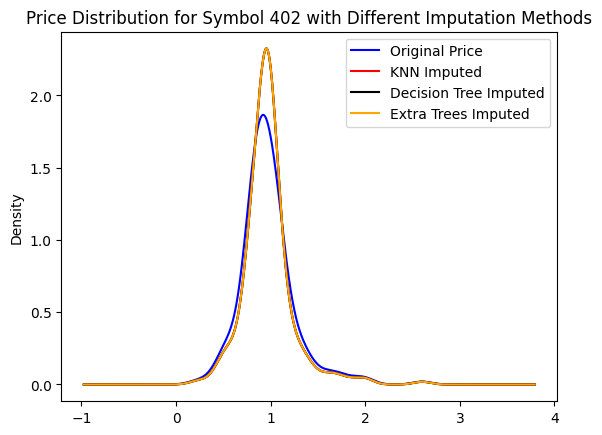

In [ ]:
# Farklı modellerin orijinal veri ile kıyaslayan grafik

import matplotlib.pyplot as plt
# KDE grafiği için görselleştirme
fig = plt.figure()
ax = fig.add_subplot(111)

symbol_value = 402
# Seçilen Symbol_encoded için her modelin imputing dağılımını KDE ile çiziyoruz
df_subset = df[df['Symbol_encoded'] == symbol_value]  # Seçilen symbol için veri alt kümesi

# Orijinal veriyi çiz
df_subset['Price'].plot(kind='kde', ax=ax, color='blue', label='Original Price')

# Her modelin imputing sonuçlarını çiz
imputed_results['KNeighborsRegressor'][df_imputed['Symbol_encoded'] == symbol_value]['Price'].plot(kind='kde', ax=ax, color='red', label='KNN Imputed')
imputed_results['DecisionTreeRegressor'][df_imputed['Symbol_encoded'] == symbol_value]['Price'].plot(kind='kde', ax=ax, color='black', label='Decision Tree Imputed')
imputed_results['ExtraTreesRegressor'][df_imputed['Symbol_encoded'] == symbol_value]['Price'].plot(kind='kde', ax=ax, color='orange', label='Extra Trees Imputed')

# Grafik label'ları (legend) ekleyelim
ax.legend(loc='best')

# Grafik başlığı ve gösterim
plt.title(f"Price Distribution for Symbol {symbol_value} with Different Imputation Methods")
plt.show()

In [ ]:
# İmputing modelleri kıyaslandı

df_imputed = impute_price_by_symbol(df, models["KNeighborsRegressor"])

In [ ]:
df_imputed.to_csv('/content/drive/MyDrive/datas/stock_sectors/df_imputed.csv', index=False)

In [ ]:
df_imputed.head()

Date  sector     Price  Symbol_encoded
0   0.0       2  1.045362               3
1   1.0       2  1.045362               3
2   2.0       2  1.045362               3
3   3.0       2  1.045362               3
4   4.0       2  1.045362               3

### Scaling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



# Farklı Symbol_encoded değerlerine göre ayrı ayrı StandardScaler uygulama fonksiyonu
def scale_by_symbol(df):
    scaler = StandardScaler()

    df_scaled = df.copy()  # Orijinal veri kaybolmasın diye bir kopya alıyoruz.

    # Her Symbol_encoded için işlem yap
    for symbol in df['Symbol_encoded'].unique():
        # İlgili Symbol_encoded değerine göre veri alt kümesi seç
        mask = df['Symbol_encoded'] == symbol
        df_subset = df.loc[mask, ['Price']]

        # StandardScaler'ı fit et ve dönüştür
        df_scaled.loc[mask, 'Price'] = scaler.fit_transform(df_subset[['Price']])

    return df_scaled

# StandardScaler uygulama
df_scaled = scale_by_symbol(df_imputed)

# Sonuçları göster
print(df_scaled)

         Date  sector     Price  Symbol_encoded
0         0.0       2  0.000000               3
1         1.0       2  0.000000               3
2         2.0       2  0.000000               3
3         3.0       2  0.000000               3
4         4.0       2  0.000000               3
...       ...     ...       ...             ...
384475  235.0       1 -0.696528            1601
384476  236.0       1 -0.020295            1601
384477  237.0       1  0.059418            1601
384478  238.0       1 -0.324245            1601
384479  239.0       1 -0.329735            1601

[384480 rows x 4 columns]


In [ ]:
df_scaled.to_csv('/content/drive/MyDrive/datas/stock_sectors/scaled_df.csv', index=False)

## **Feature Extraction-Transformation(tsfresh) ve Selection İşlemleri**

Buradan sonraki transformation ve feature extraction işlemleri için tsfresh kütüphanesi kullanıldı. Zaten bu iki işlem için optimize edilmiş bir kütüphane olduğu için işimizi kolaylaştırmaktadır.

In [ ]:
!pip install tsfresh==0.20.0

INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
df.dtypes

Date              float64
sector              int64
Price             float64
Symbol_encoded      int64
dtype: object

In [ ]:
import pandas as pd
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction.settings import EfficientFCParameters, MinimalFCParameters

In [ ]:
# tsfresh zaman serisi verilerinden özellik çıkarımı için kullanılan
# bir kütüphanedir. Burada kullandığımız extract_features fonksiyonu  "column_id"
# sütununa göre zaman serisi gruplarını tanımlar diyebiliriz. "column_sort" ise
# adından da anlaşılacağı üzerine zaman serisi verilerinin sıralanması için han-
# sütunun alınacağını verdiğimiz parametredir. "column_value" ise zaman serisinin
# analiz edilecek verilerini içeren sütun belirtmemizi sağlar. Son olarak
# "default_fc_parameters" Çıkarılacak özellik parametrelerinin karakteristik ve
# miktarını belirler. Efficient kullanmayı tercih ettim.

from tsfresh.feature_extraction import extract_features, MinimalFCParameters

df = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/scaled_df.csv')

features = extract_features(df,
                            column_id="Symbol_encoded",
                            column_sort="Date",
                            column_value="Price",
                            default_fc_parameters=EfficientFCParameters())

print(features.head())


In [ ]:
import pandas as pd
df_data = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/features.csv')
df_data.head()

Unnamed: 0  Price__variance_larger_than_standard_deviation  \
0           0                                             0.0   
1           1                                             1.0   
2           2                                             1.0   
3           3                                             0.0   
4           4                                             0.0   

   Price__has_duplicate_max  Price__has_duplicate_min  Price__has_duplicate  \
0                       0.0                       0.0                   0.0   
1                       0.0                       0.0                   1.0   
2                       0.0                       0.0                   1.0   
3                       0.0                       0.0                   1.0   
4                       0.0                       0.0                   0.0   

   Price__sum_values  Price__abs_energy  Price__mean_abs_change  \
0       2.242651e-13              240.0                1.097413   
1       1.332268e-14              240.0                0.920213   
2      -8.221201e-13              240.0                0.792561   
3      -4.285461e-14              240.0                0.755413   
4       5.115908e-13              240.0                1.074138   

   Price__mean_change  Price__mean_second_derivative_central  ...  \
0           -0.001891                              -0.003918  ...   
1            0.000234                               0.001172  ...   
2           -0.008826                              -0.008964  ...   
3           -0.002712                              -0.015722  ...   
4            0.001329                              -0.003212  ...   

   Price__fourier_entropy__bins_5  Price__fourier_entropy__bins_10  \
0                        0.879953                         1.524119   
1                        1.281411                         1.895721   
2                        1.170570                         1.832739   
3                        0.880198                         1.491059   
4                        1.176398                         1.846759   

   Price__fourier_entropy__bins_100  \
0                          3.496088   
1                          3.821208   
2                          3.786689   
3                          3.460588   
4                          3.818839   

   Price__permutation_entropy__dimension_3__tau_1  \
0                                        1.788076   
1                                        1.789792   
2                                        1.439333   
3                                        1.422792   
4                                        1.789537   

   Price__permutation_entropy__dimension_4__tau_1  \
0                                        3.133668   
1                                        3.141650   
2                                        2.184741   
3                                        2.301448   
4                                        3.144696   

   Price__permutation_entropy__dimension_5__tau_1  \
0                                        4.535110   
1                                        4.468278   
2                                        2.767814   
3                                        3.076337   
4                                        4.523116   

   Price__permutation_entropy__dimension_6__tau_1  \
0                                        5.230185   
1                                        5.246436   
2                                        3.024733   
3                                        3.422974   
4                                        5.216941   

   Price__permutation_entropy__dimension_7__tau_1  \
0                                        5.407926   
1                                        5.407926   
2                                        3.116085   
3                                        3.481375   
4                                        5.419775   

   Price__query_similarity_count__query_None__threshold_0.0  \
0    

In [ ]:
# Özellik çıkarımı sonrası boş olan sütunların filtrelenmesi işlemi

import pandas as pd

# CSV dosyasını yükle
df = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/features.csv')

# Sadece tamamen boş olan sütunları bul
missing_columns = df.columns[df.isna().all()]

# Her bir boş sütunun adını ve içindeki boş değer sayısını yazdır
for column in missing_columns:
    print(f"Sütun: {column}, Boş Değer Sayısı: {df[column].isna().sum()}")

# Boş sütunları kaldır
df_cleaned = df.dropna(axis=1, how='all')

# Temizlenmiş veri çerçevesini aynı dosyaya kaydet
df_cleaned.to_csv('/content/drive/MyDrive/datas/stock_sectors/features_data.csv', index=False)

print("\nTemizlenmiş veri başarıyla kaydedildi.")

Sütun: Price__query_similarity_count__query_None__threshold_0.0, Boş Değer Sayısı: 1602

Temizlenmiş veri başarıyla kaydedildi.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/features_data.csv')

In [ ]:
df.isna().sum().sum()

4318

In [ ]:
from pywt import cwt
from tsfresh.utilities.dataframe_functions import impute
features = impute(df)

In [ ]:
features.isna().sum().sum()

0

In [ ]:
!pip install --no-cache-dir scipy==1.11.3 xgboost==2.1.3 scikit-learn==1.3.0 tsfresh==0.20.0 scikit-image==0.21.0 # Versiyon uyuşmazlığını önlemek için

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 16.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 157.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 177.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 181.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 172.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 177.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 190.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 172.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 198.2 MB

In [ ]:
# y label üretmek için bir önceki scaled edilmiş data nın şirket bazlı gruplanıp
# etiketlerinin çıkartılması işlemi gerçekleştirilmiştir.

import pandas as pd
y_df = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/scaled_df.csv')

y_grouped = y_df.groupby("Symbol_encoded")["sector"].first().reset_index()  # Her Symbol_encoded için ilk sector değeri alınır

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/features_data.csv')

In [ ]:
# RandomForestClassifier ile extraction yapılan veriden veri seçimi işlemini yapıyorum

# Gerekli kütüphaneleri içe aktar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Özellikleri ve hedef değişkeni tanımla
X = features
y = y_grouped["sector"]

# Veri setini eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Recursive Feature Elimination (RFE) yöntemi
selector_rfe = RFE(RandomForestClassifier(random_state=10))
selector_rfe.fit(X_train, y_train)

# Seçilen özellikleri al
selected_features_rfe = X_train.columns[selector_rfe.get_support()]
print(f"RFE Selected Features ({len(selected_features_rfe)}): {list(selected_features_rfe)}")

RFE Selected Features (389): ['Unnamed: 0.1', 'Price__mean_change', 'Price__mean_second_derivative_central', 'Price__mean', 'Price__skewness', 'Price__kurtosis', 'Price__percentage_of_reoccurring_values_to_all_values', 'Price__maximum', 'Price__absolute_maximum', 'Price__minimum', 'Price__benford_correlation', 'Price__time_reversal_asymmetry_statistic__lag_1', 'Price__time_reversal_asymmetry_statistic__lag_2', 'Price__quantile__q_0.1', 'Price__quantile__q_0.2', 'Price__quantile__q_0.4', 'Price__quantile__q_0.6', 'Price__quantile__q_0.7', 'Price__autocorrelation__lag_2', 'Price__autocorrelation__lag_3', 'Price__agg_autocorrelation__f_agg_"mean"__maxlag_40', 'Price__partial_autocorrelation__lag_2', 'Price__partial_autocorrelation__lag_3', 'Price__binned_entropy__max_bins_10', 'Price__index_mass_quantile__q_0.1', 'Price__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)', 'Price__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)', 'Price__cwt_coefficients__coeff_3__w_20__widths_(

In [ ]:
# rfe feature selection sonrası datanın filtrelenip kaydedilme işlemi gerçekleştirildi
selected_data = features[selected_features_rfe]
selected_data.to_csv("/content/drive/MyDrive/datas/stock_sectors/selected_rfe_data.csv")

In [ ]:
# Gerekli kütüphaneleri içe aktar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings

# Uyarıları kapat
warnings.filterwarnings("ignore")

# Özellikleri ve hedef değişkeni tanımla
X = features
y = y_grouped["sector"]

# Veri setini eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# L1 Regularization (Lasso) yöntemi
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=10)
lasso.fit(X_train, y_train)

# Sıfır olmayan katsayıya sahip özellikleri seç
selected_features_lasso = X_train.columns[lasso.coef_[0] != 0]
print(f"Lasso Selected Features ({len(selected_features_lasso)}): {list(selected_features_lasso)}")

Lasso Selected Features (273): ['Unnamed: 0', 'Price__abs_energy', 'Price__length', 'Price__kurtosis', 'Price__absolute_sum_of_changes', 'Price__longest_strike_below_mean', 'Price__number_cwt_peaks__n_5', 'Price__fft_coefficient__attr_"real"__coeff_1', 'Price__fft_coefficient__attr_"real"__coeff_2', 'Price__fft_coefficient__attr_"real"__coeff_4', 'Price__fft_coefficient__attr_"real"__coeff_5', 'Price__fft_coefficient__attr_"real"__coeff_8', 'Price__fft_coefficient__attr_"real"__coeff_9', 'Price__fft_coefficient__attr_"real"__coeff_10', 'Price__fft_coefficient__attr_"real"__coeff_11', 'Price__fft_coefficient__attr_"real"__coeff_12', 'Price__fft_coefficient__attr_"real"__coeff_13', 'Price__fft_coefficient__attr_"real"__coeff_14', 'Price__fft_coefficient__attr_"real"__coeff_15', 'Price__fft_coefficient__attr_"real"__coeff_16', 'Price__fft_coefficient__attr_"real"__coeff_17', 'Price__fft_coefficient__attr_"real"__coeff_21', 'Price__fft_coefficient__attr_"real"__coeff_22', 'Price__fft_coeff

In [ ]:
selected_data = features[selected_features_lasso]
selected_data.to_csv("/content/drive/MyDrive/datas/stock_sectors/selected_lasso_data.csv")

In [ ]:
# Öncelikle hepsini rfe ile seçtiğim özellikler üzerinden sonra ise en iyisini lasso ile de eğitip kıyaslayacağım
import pandas as pd
selected_data = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/selected_rfe_data.csv')

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/selected_data_rfe.csv')

In [ ]:
# y label üretmek için bir önceki scaled edilmiş data nın şirket bazlı gruplanıp
# etiketlerinin çıkartılması işlemi gerçekleştirilmiştir.

import pandas as pd
y_df = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/scaled_df.csv')

y_grouped = y_df.groupby("Symbol_encoded")["sector"].first().reset_index()  # Her Symbol_encoded için ilk sector değeri alınır

In [ ]:
# Özellikleri ve hedef değişkeni tanımla
X = features
y = y_grouped["sector"]

## **Model Denemeleri**

Model eğitimleri yapılmıştır. Elde ettiğimiz veriyi farklı modeller üzerinde denedim. Daha sonrasında ise en iyi modeli kayıt ettim. Modellerin parametreleriyle oynanıp analiz edilmiştir.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)
print(type(X), type(y))

(1602, 389) (1602,)
(321, 389) (321,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Özellikler (X) ve hedef değişken (y) olarak ayırma
X = selected_data
y = y_grouped['sector']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Özellikler (X) ve hedef değişken (y) olarak ayırma
X = selected_data
y = y_grouped['sector']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Pipeline oluşturma
pipe = make_pipeline(
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
)

# Eğitim verisi üzerinde model eğitimi
pipe.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = pipe.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.4f}")

# Sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(report)

Doğruluk Skoru: 0.7477
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       120
           1       0.69      0.74      0.72       104
           2       0.65      0.68      0.66        97

    accuracy                           0.75       321
   macro avg       0.75      0.74      0.74       321
weighted avg       0.76      0.75      0.75       321



In [ ]:
# Pipeline oluşturma
pipe = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Eğitim verisi üzerinde model eğitimi
pipe.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = pipe.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.4f}")

# Sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(report)

Doğruluk Skoru: 0.7290
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       120
           1       0.63      0.76      0.69       104
           2       0.67      0.64      0.66        97

    accuracy                           0.73       321
   macro avg       0.73      0.72      0.73       321
weighted avg       0.74      0.73      0.73       321



In [ ]:
# RFE Selection
pipe = make_pipeline(
    HistGradientBoostingClassifier(random_state=42)
)

# Eğitim verisi üzerinde model eğitimi
pipe.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = pipe.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.4f}")

# Sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(report)

Doğruluk Skoru: 0.7695
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       120
           1       0.69      0.83      0.75       104
           2       0.72      0.63      0.67        97

    accuracy                           0.77       321
   macro avg       0.77      0.76      0.76       321
weighted avg       0.78      0.77      0.77       321



In [ ]:
# Öncelikle hepsini rfe ile seçtiğim özellikler üzerinden sonra ise en iyisini lasso ile de eğitip kıyaslayacağım
import pandas as pd
selected_data = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/selected_data_lasso.csv')

In [ ]:
# Özellikler (X) ve hedef değişken (y) olarak ayırma
X = selected_data
y = y_grouped['sector']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Lasso Selection (en iyi model üzerinde bir de lasso denendi, sonuçlar neredeyse aynı geldi)
pipe = make_pipeline(
    HistGradientBoostingClassifier(random_state=42)
)

# Eğitim verisi üzerinde model eğitimi
pipe.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = pipe.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.4f}")

# Sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(report)

Doğruluk Skoru: 0.7695
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       120
           1       0.71      0.81      0.76       104
           2       0.70      0.65      0.67        97

    accuracy                           0.77       321
   macro avg       0.77      0.76      0.76       321
weighted avg       0.77      0.77      0.77       321



**Derste gösterilen şekilde model kayıt edilirken veri setinin train test olarak bölünmeden tamamı kullanılarak eğitilip kayıt edildi.**

In [ ]:
# RFE Selection
pipe = make_pipeline(
    HistGradientBoostingClassifier(random_state=42)
)
# Tüm veri seti üzerinde model eğitimi
pipe.fit(X, y)

Pipeline(steps=[('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [ ]:
import joblib

# Modeli kaydet
joblib.dump(pipe, "/content/drive/MyDrive/datas/models/model_hist.pkl")

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


In [ ]:
pipe = make_pipeline(
    SVC(kernel="rbf", probability=True, random_state=42)
)

# Eğitim verisi üzerinde model eğitimi
pipe.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = pipe.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.4f}")

# Sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(report)

Doğruluk Skoru: 0.6885
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       120
           1       0.61      0.72      0.66       104
           2       0.61      0.58      0.59        97

    accuracy                           0.69       321
   macro avg       0.69      0.68      0.68       321
weighted avg       0.70      0.69      0.69       321



In [ ]:
pipe = make_pipeline(
    MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500, random_state=42)
)

# Eğitim verisi üzerinde model eğitimi
pipe.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = pipe.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.4f}")

# Sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:")
print(report)


Doğruluk Skoru: 0.6262
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       120
           1       0.59      0.44      0.51       104
           2       0.48      0.67      0.56        97

    accuracy                           0.63       321
   macro avg       0.63      0.62      0.62       321
weighted avg       0.65      0.63      0.63       321



In [ ]:
X = merged_df
y = y_grouped["sector"]

In [ ]:
print(X.shape)
y.shape

(240, 1603)


(1602,)

## **Pipeline Hazırlama**

Pipeline kullanımı gerçekleştirildi ve modeller gridSearch kullanarak testi edildi. Yapıyı daha önceki ayrı ayrı uyguladığımız aşamaların birleştirilmesi şeklinde ayarladım.

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/combined_df.csv')

In [ ]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config

# Tsfresh transformer sınıfı
class TsfreshTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X  # Burada herhangi bir işlem yapılmıyor, sadece Pipeline yapısı gösteriliyor.

# Pipeline adımları
ordinal_encoder = OrdinalEncoder()
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=2))
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('date_enc', ordinal_encoder, ['Date']),
        ('impute_scale', Pipeline(steps=[('impute', imputer), ('scale', scaler)]), slice(1, None))
    ]
)

tsfresh_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('tsfresh', TsfreshTransformer()),
    ('feature_selection', RFE(RandomForestClassifier(random_state=42)))
])

# Pipeline yapısını görselleştirme
set_config(display='diagram')
tsfresh_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('date_enc', OrdinalEncoder(),
                                                  ['Date']),
                                                 ('impute_scale',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=KNeighborsRegressor(weights='distance'))),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  slice(1, None, None))])),
                ('tsfresh', TsfreshTransformer()),
                ('feature_selection',
                 RFE(estimator=RandomForestClassifier(random_state=42)))])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator, TransformerMixin


# Tsfresh özelliği çıkarma fonksiyonu
def tsfresh_transform(df):
    """
    Veriyi tsfresh'in istediği formata uygun hale getirir ve özellik çıkarımı yapar.
    """
    # numpy.ndarray yerine pandas DataFrame bekliyoruz
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df)

    df_long = df.melt(id_vars=['Date'], var_name='Symbol', value_name='Price')
    df_long['Symbol_encoded'] = df_long['Symbol'].astype('category').cat.codes
    df_long = df_long.drop(columns=['Symbol'])

    features = extract_features(df_long,
                                column_id="Symbol_encoded",
                                column_sort="Date",
                                column_value="Price",
                                default_fc_parameters=EfficientFCParameters())
    features = impute(features)
    return features


# Tsfresh transformer sınıfı
class TsfreshTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # TSFresh transformasyonunda fit adımı gerekli değil, sadece bir placeholder
        return self

    def transform(self, X):
        # numpy.ndarray verisi geldiğinde onu DataFrame'e dönüştür
        return tsfresh_transform(X)


# Pipeline adımları
ordinal_encoder = OrdinalEncoder()
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=2))
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('date_enc', ordinal_encoder, ['Date']),
        ('impute_scale', Pipeline(steps=[('impute', imputer), ('scale', scaler)]), slice(1, None))
    ]
)

tsfresh_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('tsfresh', TsfreshTransformer()),
    ('feature_selection', RFE(RandomForestClassifier(random_state=42)))
])

# Model seçimleri ve GridSearch parametreleri
models = {
    'knn': KNeighborsClassifier(),
    'logistic': LogisticRegression(max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(random_state=42),
    'gbc': GradientBoostingClassifier(random_state=42),
    'hgbc': HistGradientBoostingClassifier(random_state=42),
    'svm': SVC(),
    'mlp': MLPClassifier(max_iter=1000)
}

param_grid = {
    'knn': {'n_neighbors': [3, 5, 7]},
    'logistic': {'C': [0.1, 1, 10]},
    'decision_tree': {'max_depth': [5, 10, None]},
    'random_forest': {'n_estimators': [100, 200], 'max_depth': [10, None]},
    'gbc': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'hgbc': {'max_iter': [100, 200]},
    'svm': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'mlp': {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]}
}

def train_best_model(X, y):
    """
    En iyi modelin eğitimini yapar.
    """
    # Veri ön işleme ve TSFresh özellik çıkarımı
    X_transformed = tsfresh_pipeline.fit_transform(X)

    # Özellik seçimi sonrası veriyi eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    best_model, best_score = None, 0

    # Modelleri ve parametre gridini kullanarak en iyi modelin seçilmesi
    for name, model in models.items():
        grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)  # Eğitim verisi üzerinde model eğitimi

        # Test verisi ile en iyi modeli değerlendirme
        score = grid_search.best_score_
        if score > best_score:
            best_score = score
            best_model = grid_search.best_estimator_

    return best_model

In [ ]:
train_best_model(X,y)

##**Test**

**Test** Real-estate sektöründen aldığım ilk iki şirketin çıktısını aldım. Daha sonra bunların hangi sektöre en çok benzediğini gözlemlemiş oldum. Yine eğitim sırasında uygulanan tüm işlemler veriye uygulanmıştır.

In [ ]:
import pandas as pd
import yfinance
real_estate = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/real-estate.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
real_estate = real_estate['Symbol'].to_list()

In [ ]:
ticker_list=real_estate
data = yfinance.download(ticker_list, start='2005-01-01', end='2025-01-01')
data_close=data[['Close']]
data_close.columns = ['_'.join(col) for col in data_close.columns]# MultiIndex to SingleIndex
data_monthly_mom=data['Close'].resample('ME').last().pct_change()+1

[*********************100%***********************]  262 of 262 completed


In [ ]:
data_monthly_mom.to_csv("/content/drive/MyDrive/datas/stock_sectors/real_estate_monthly_mom.csv")
data = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/real_estate_monthly_mom.csv')

In [ ]:
df_subset = data.iloc[:, :3]
df_subset.head()

Date  AAT       ABR
0  2005-01-31  NaN       NaN
1  2005-02-28  NaN  1.050420
2  2005-03-31  NaN  0.990000
3  2005-04-30  NaN  1.011258
4  2005-05-31  NaN  1.087755

In [ ]:
df_subset.isna().sum().sum()

74

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    240 non-null    object 
 1   AAT     167 non-null    float64
 2   ABR     239 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.8+ KB


In [ ]:
# Her dosyayı uygun formatta dönüştürme
def melt_data(df):
    # 'Date' ve hisse sütunlarını 'Date', 'Symbol' ve 'Price' formatına getirme
    melted_df = pd.melt(df, id_vars=['Date'], var_name='Symbol', value_name='Price')
    return melted_df

# Her bir dosyayı dönüştür
R_melted = melt_data(df_subset)

In [ ]:
R_melted.head()
R_melted.to_csv("/content/drive/MyDrive/datas/stock_sectors/real_estate_melted.csv")

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def encode_data(file_path, output_path):
    # CSV dosyasını oku
    df = pd.read_csv(file_path)

    # Tarih sütunu (ilk sütun) için Ordinal Encoding
    encoder_date = OrdinalEncoder()
    df.iloc[:, 0] = encoder_date.fit_transform(df.iloc[:, [0]])
    print(f"{file_path}: İlk sütundaki tarihler ordinal encoding ile dönüştürüldü.")

    # Symbol sütunu için Label Encoding
    if "Symbol" in df.columns:
        encoder_symbol = LabelEncoder()
        df["Symbol_encoded"] = encoder_symbol.fit_transform(df["Symbol"])
        df.drop(columns=["Symbol"], inplace=True)
        print(f"{file_path}: 'Symbol' sütunu Label Encoding ile dönüştürüldü ve orijinal sütun kaldırıldı.")

    # Dönüştürülmüş veriyi kaydet
    df.to_csv(output_path, index=False)
    print(f"Encoded CSV başarıyla kaydedildi: {output_path}")

# Kullanım
dosya_yolu = "/content/drive/MyDrive/datas/stock_sectors/real_estate_melted.csv"
cikti_yolu = "/content/drive/MyDrive/datas/stock_sectors/encoded_df_real.csv"
encode_data(dosya_yolu, cikti_yolu)

/content/drive/MyDrive/datas/stock_sectors/real_estate_melted.csv: İlk sütundaki tarihler ordinal encoding ile dönüştürüldü.
/content/drive/MyDrive/datas/stock_sectors/real_estate_melted.csv: 'Symbol' sütunu Label Encoding ile dönüştürüldü ve orijinal sütun kaldırıldı.
Encoded CSV başarıyla kaydedildi: /content/drive/MyDrive/datas/stock_sectors/encoded_df_real.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datas/stock_sectors/encoded_df_real.csv')

In [ ]:
df_imputed_real = impute_price_by_symbol(df, models["KNeighborsRegressor"])

In [ ]:
df_imputed_real.head()

Unnamed: 0        Date    Price  Symbol_encoded
0           0  2005-01-31  1.00712               0
1           1  2005-02-28  1.00712               0
2           2  2005-03-31  1.00712               0
3           3  2005-04-30  1.00712               0
4           4  2005-05-31  1.00712               0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



# Farklı Symbol_encoded değerlerine göre ayrı ayrı StandardScaler uygulama fonksiyonu
def scale_by_symbol(df):
    scaler = StandardScaler()

    df_scaled = df.copy()  # Orijinal veri kaybolmasın diye bir kopya alıyoruz.

    # Her Symbol_encoded için işlem yap
    for symbol in df['Symbol_encoded'].unique():
        # İlgili Symbol_encoded değerine göre veri alt kümesi seç
        mask = df['Symbol_encoded'] == symbol
        df_subset = df.loc[mask, ['Price']]

        # StandardScaler'ı fit et ve dönüştür
        df_scaled.loc[mask, 'Price'] = scaler.fit_transform(df_subset[['Price']])

    return df_scaled

# StandardScaler uygulama
df_scaled = scale_by_symbol(df_imputed_real)

# Sonuçları göster
print(df_scaled)

     Unnamed: 0        Date         Price  Symbol_encoded
0             0  2005-01-31 -3.508772e-15               0
1             1  2005-02-28 -3.508772e-15               0
2             2  2005-03-31 -3.508772e-15               0
3             3  2005-04-30 -3.508772e-15               0
4             4  2005-05-31 -3.508772e-15               0
..          ...         ...           ...             ...
475         475  2024-08-31  7.351060e-02               1
476         476  2024-09-30  5.250273e-01               1
477         477  2024-10-31 -3.261227e-01               1
478         478  2024-11-30  7.399957e-03               1
479         479  2024-12-31 -3.399490e-01               1

[480 rows x 4 columns]


In [ ]:
!pip install --no-cache-dir scipy==1.11.3 xgboost==2.1.3 scikit-learn==1.3.0 tsfresh==0.20.0 scikit-image==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 101.3 MB/s eta

In [ ]:
df_scaled.to_csv("/content/drive/MyDrive/datas/stock_sectors/df_scaled_real.csv")

In [ ]:
#

from tsfresh.feature_extraction import extract_features, MinimalFCParameters, EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

df = df_scaled

features = extract_features(df,
                            column_id="Symbol_encoded",
                            column_sort="Date",
                            column_value="Price",
                            default_fc_parameters=EfficientFCParameters())
impute(features)

print(features.head())

In [ ]:
data_tsfreshed = pd.read_csv("/content/real-estate_features.csv")
data_tsfreshed.to_csv("/content/drive/MyDrive/datas/stock_sectors/real-estate_features.csv")

In [ ]:
# Gerekli kütüphaneleri içe aktar
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Özellikleri tanımla (Y hedef değişkeni yok)
X = data_tsfreshed  # Yalnızca özellikler içeren DataFrame

# Model oluştur
model = RandomForestClassifier(random_state=10)

# Recursive Feature Elimination (RFE) yöntemi
selector_rfe = RFE(model)
selector_rfe.fit(X, [0] * len(X))  # Y olmadığı için sahte bir etiket (hepsi 0) kullan

# Seçilen özellikleri al
selected_features_rfe = X.columns[selector_rfe.get_support()]
print(f"RFE Selected Features ({len(selected_features_rfe)}): {list(selected_features_rfe)}")

RFE Selected Features (389): ['Price__fft_coefficient__attr_"imag"__coeff_24', 'Price__fft_coefficient__attr_"imag"__coeff_25', 'Price__fft_coefficient__attr_"imag"__coeff_26', 'Price__fft_coefficient__attr_"imag"__coeff_27', 'Price__fft_coefficient__attr_"imag"__coeff_28', 'Price__fft_coefficient__attr_"imag"__coeff_29', 'Price__fft_coefficient__attr_"imag"__coeff_30', 'Price__fft_coefficient__attr_"imag"__coeff_31', 'Price__fft_coefficient__attr_"imag"__coeff_32', 'Price__fft_coefficient__attr_"imag"__coeff_33', 'Price__fft_coefficient__attr_"imag"__coeff_34', 'Price__fft_coefficient__attr_"imag"__coeff_35', 'Price__fft_coefficient__attr_"imag"__coeff_36', 'Price__fft_coefficient__attr_"imag"__coeff_37', 'Price__fft_coefficient__attr_"imag"__coeff_38', 'Price__fft_coefficient__attr_"imag"__coeff_39', 'Price__fft_coefficient__attr_"imag"__coeff_40', 'Price__fft_coefficient__attr_"imag"__coeff_41', 'Price__fft_coefficient__attr_"imag"__coeff_42', 'Price__fft_coefficient__attr_"imag"__c

**Önemli!** feature extraction dan sonra test için selection işlemi yapılmaz çünkü zaten train kısmında eğitilen sütunlar kullanılması gerektiğinden direkt bir train kısmındaki feature'lar kullanılır.

In [ ]:
import pandas as pd

# Veriyi oku
df = pd.read_csv("/content/drive/MyDrive/datas/stock_sectors/selected_data_rfe.csv")

# Sütun adlarını listeye al
column_names = df.columns.tolist()

# Sonucu yazdır
print(column_names)


['Unnamed: 0', 'Price__sum_values', 'Price__mean_change', 'Price__mean_second_derivative_central', 'Price__skewness', 'Price__kurtosis', 'Price__absolute_sum_of_changes', 'Price__first_location_of_minimum', 'Price__percentage_of_reoccurring_values_to_all_values', 'Price__maximum', 'Price__absolute_maximum', 'Price__minimum', 'Price__benford_correlation', 'Price__time_reversal_asymmetry_statistic__lag_1', 'Price__time_reversal_asymmetry_statistic__lag_2', 'Price__quantile__q_0.1', 'Price__quantile__q_0.3', 'Price__quantile__q_0.4', 'Price__quantile__q_0.8', 'Price__quantile__q_0.9', 'Price__autocorrelation__lag_2', 'Price__autocorrelation__lag_3', 'Price__autocorrelation__lag_6', 'Price__autocorrelation__lag_7', 'Price__agg_autocorrelation__f_agg_"mean"__maxlag_40', 'Price__partial_autocorrelation__lag_3', 'Price__index_mass_quantile__q_0.1', 'Price__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)', 'Price__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)', 'Price__cwt_coeffi

In [ ]:
data_tsfreshed_selected = data_tsfreshed[column_names]
data_tsfreshed_selected.to_csv("/content/drive/MyDrive/datas/stock_sectors/selected_data_rfe_real.csv")

In [ ]:
data_tsfreshed_selected = pd.read_csv("/content/drive/MyDrive/datas/stock_sectors/selected_data_rfe_real.csv")

In [ ]:
!pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
# Kaydedilmiş modeli yükle
import joblib
loaded_model = joblib.load("/content/drive/MyDrive/datas/models/model_hist.pkl")

# Modeli kullanarak tahmin yap
# Gereksiz sütunu kaldır
data_tsfreshed_selected = data_tsfreshed_selected.drop(columns=["Unnamed: 0.1"], errors="ignore")
y_pred_loaded = loaded_model.predict_proba(data_tsfreshed_selected)

# Çıktıların yüzdesel olarak hesaplamasını yaptım. Çok fazla veri olsaydı for
# döngüsü kullancaktım. Ancak iki tanesini analiz ettim.

array_1 = [y_pred_loaded[0][0]/(y_pred_loaded[0][0]+y_pred_loaded[0][1]+y_pred_loaded[0][2])*100,
         y_pred_loaded[0][1]/(y_pred_loaded[0][0]+y_pred_loaded[0][1]+y_pred_loaded[0][2])*100,
         y_pred_loaded[0][2]/(y_pred_loaded[0][0]+y_pred_loaded[0][1]+y_pred_loaded[0][2])*100]

array_2 = [y_pred_loaded[1][0]/(y_pred_loaded[1][0]+y_pred_loaded[1][1]+y_pred_loaded[1][2])*100,
         y_pred_loaded[1][1]/(y_pred_loaded[1][0]+y_pred_loaded[1][1]+y_pred_loaded[1][2])*100,
         y_pred_loaded[1][2]/(y_pred_loaded[1][0]+y_pred_loaded[1][1]+y_pred_loaded[1][2])*100]


In [ ]:
# [Technology, Finance, Healt] şeklinde yüzde çıktıları
sectors = ['T', 'F', 'H']
for s, v in zip(sectors, array_1):
  print(f"{s}: {v:.2f}%")

T: 99.99%
F: 0.00%
H: 0.00%


In [ ]:
# [Technology, Finance, Healt] şeklinde yüzde çıktıları
sectors = ['T', 'F', 'H']
for s, v in zip(sectors, array_2):
  print(f"{s}: {v:.2f}%")

T: 61.79%
F: 1.62%
H: 36.59%


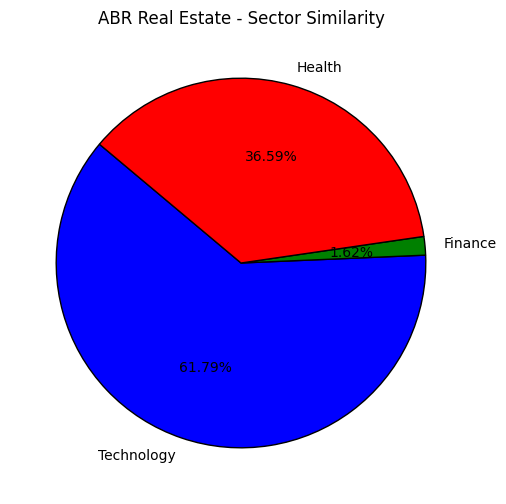

In [ ]:
import matplotlib.pyplot as plt

# Veriler
labels = ['Technology', 'Finance', 'Health']
sizes = [61.79, 1.62, 36.59]
colors = ['blue', 'green', 'red']

# Pasta grafiği oluşturma
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('ABR Real Estate - Sector Similarity')
plt.show()

**Bonusu** uygulamaya çalıştım ancak yeni sütunlar diğer bir değişle öznitelikler eklendi ancak daha sonrasında ram hatası verdi. Bonusta istenilen sütunların çıkarımını yaptım ve imputing gibi gerekli işlemlerden sonra ram hataları almaya başladım.

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=41acfd2481307c824d4eb48c723b9ee76847399f0710546a9aa919bbf24d74ae
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import pandas as pd
import ta

# Veri setini yükleyelim (örnek olarak CSV formatı kullanıyorum)
df = pd.read_csv("/content/drive/MyDrive/datas/stock_sectors/df_imputed.csv")

# Teknik göstergeleri hesaplayan fonksiyon
def calculate_factors(group):
    group["momentum"] = group["Price"].diff()  # Basit momentum hesaplama
    group["volatility"] = group["Price"].rolling(window=14).std()  # 14 günlük volatilite
    group["rsi"] = ta.momentum.RSIIndicator(group["Price"], window=14).rsi()
    macd = ta.trend.MACD(group["Price"])
    group["macd"] = macd.macd()
    group["macd_signal"] = macd.macd_signal()

    return group

# Symbol bazında gruplama yaparak faktörleri hesapla
df = df.groupby("Symbol_encoded", group_keys=False).apply(calculate_factors)

# İlk satırlara bakalım
print(df.head())

# İşlenmiş veriyi kaydetmek istersen:
df.to_csv("/content/drive/MyDrive/datas/bonus/processed_data.csv", index=False)

<ipython-input-12-63299fe60da5>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("Symbol_encoded", group_keys=False).apply(calculate_factors)


   Date  sector     Price  Symbol_encoded  momentum  volatility  rsi  macd  \
0   0.0       2  1.045362               3       NaN         NaN  NaN   NaN   
1   1.0       2  1.045362               3       0.0         NaN  NaN   NaN   
2   2.0       2  1.045362               3       0.0         NaN  NaN   NaN   
3   3.0       2  1.045362               3       0.0         NaN  NaN   NaN   
4   4.0       2  1.045362               3       0.0         NaN  NaN   NaN   

   macd_signal  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [ ]:
import pandas as pd

# Veriyi yükleyelim
df = pd.read_csv("/content/drive/MyDrive/datas/stock_sectors/df_imputed.csv")

# 'sector' sütununu çıkar
df = df.drop(columns=['sector'])

# Veriyi geniş formatta pivotla
df_pivot = df.pivot(index='Date', columns='Symbol_encoded', values='Price')

# Date sütununu geri ekleyelim
df_pivot.reset_index(inplace=True)

# Sonuçları göster
print(df_pivot)
df_pivot.to_csv('/content/drive/MyDrive/datas/bonus/df_pivot.csv', index=False)

Symbol_encoded   Date         0         1         2         3         4  \
0                 0.0  1.013190  1.005839  1.011382  1.045362  1.026804   
1                 1.0  1.085481  0.990132  1.011382  1.045362  1.166710   
2                 2.0  0.925000  1.006644  1.011382  1.045362  0.928890   
3                 3.0  0.934685  0.986799  1.011382  1.045362  0.865371   
4                 4.0  1.157109  1.003345  1.011382  1.045362  1.102607   
..                ...       ...       ...       ...       ...       ...   
235             235.0  1.010750  1.038961  0.931271  1.188482  1.032353   
236             236.0  1.038903  1.062500  1.041849  1.260793  1.017467   
237             237.0  0.879024  0.935294  1.038976  1.091544  0.969571   
238             238.0  1.058783  0.955975  1.181508  2.638925  1.051707   
239             239.0  0.975490  1.013158  0.845051  0.894226  1.055155   

Symbol_encoded         5         6         7         8  ...      1592  \
0               1.017044  

In [ ]:
import pandas as pd
import ta  # Teknik analiz kütüphanesi

# Veriyi yükleyelim
df_pivot = pd.read_csv('/content/drive/MyDrive/datas/bonus/df_pivot.csv')

# Date sütununu datetime formatına çevir (eğer değilse)
#df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])

def calculate_factors(df):
    # Yeni DataFrame oluşturacağız, burada sadece teknik göstergeler olacak
    new_columns = []

    for col in df.columns:
        if col != "Date":  # Sadece fiyat sütunları için uygula
            # Momentum hesapla
            new_columns.append(df[col].diff().rename(f"momentum_{col}"))

            # Volatilite hesapla
            new_columns.append(df[col].rolling(window=14).std().rename(f"volatility_{col}"))

            # RSI hesapla
            new_columns.append(ta.momentum.RSIIndicator(df[col], window=14).rsi().rename(f"rsi_{col}"))

            # MACD hesapla
            macd = ta.trend.MACD(df[col])
            new_columns.append(macd.macd().rename(f"macd_{col}"))
            new_columns.append(macd.macd_signal().rename(f"macd_signal_{col}"))

    # Yeni sütunları orijinal df'ye ekle
    df_factors = pd.concat([df] + new_columns, axis=1)
    return df_factors


# Faktörleri hesapla
df_factors = calculate_factors(df_pivot)

# Yeni dataframe'i CSV olarak kaydet
df_factors.to_csv('/content/drive/MyDrive/datas/bonus/df_factors.csv', index=False)

# Sonucu göster
print(df_factors.head())


   Date         0         1         2         3         4         5         6  \
0   0.0  1.013190  1.005839  1.011382  1.045362  1.026804  1.017044  1.012670   
1   1.0  1.085481  0.990132  1.011382  1.045362  1.166710  1.017044  1.057031   
2   2.0  0.925000  1.006644  1.011382  1.045362  0.928890  1.017044  0.950265   
3   3.0  0.934685  0.986799  1.011382  1.045362  0.865371  1.017044  1.030196   
4   4.0  1.157109  1.003345  1.011382  1.045362  1.102607  1.017044  1.020115   

         7         8  ...  momentum_1600  volatility_1600  rsi_1600  \
0  0.96126  1.002044  ...            NaN              NaN       NaN   
1  0.96126  1.081784  ...            0.0              NaN       NaN   
2  0.96126  0.855670  ...            0.0              NaN       NaN   
3  0.96126  1.004016  ...            0.0              NaN       NaN   
4  0.96126  0.952000  ...            0.0              NaN       NaN   

   macd_1600  macd_signal_1600  momentum_1601  volatility_1601  rsi_1601  \
0        N

In [ ]:
df_factors.to_csv('/content/drive/MyDrive/datas/bonus/df_factors.csv', index=False)

##**Sonuçların analizi ve Rapor**

Dizin yapımı hiyerarşik olarak modelleri, verileri ve bonus işlemleri farklı klasörlerde olacak şekilde oluşturdum. 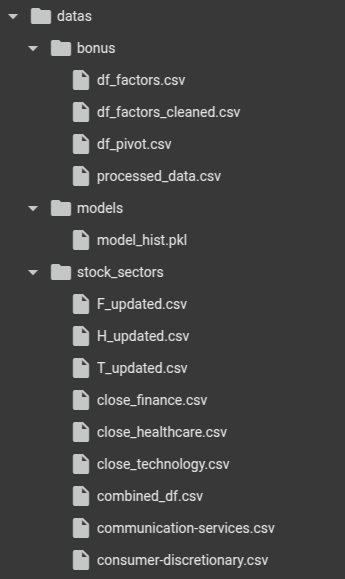

Daha sonrasında veri seti üzerinde encoded-imputing-aykırı değer kontrolü-scaling ve bonusu da uygulamaya çalıştım ama ram sıkıntısı yaşadım son olarak tsfresh kütüphanesi ile transformation ve feature extraction işlemlerini otomatize bir şekilde uyguladım.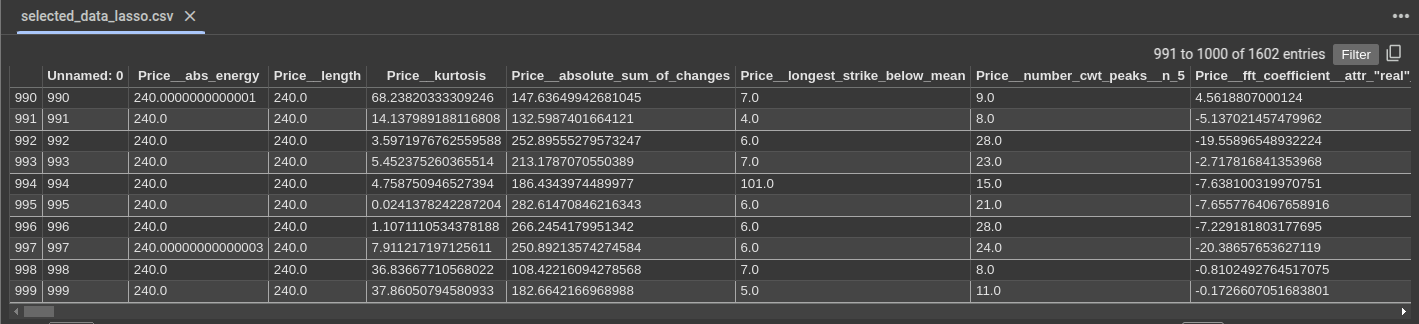
Pipline yapısının gösterimi aşağıdaki görselde verilmiştir.
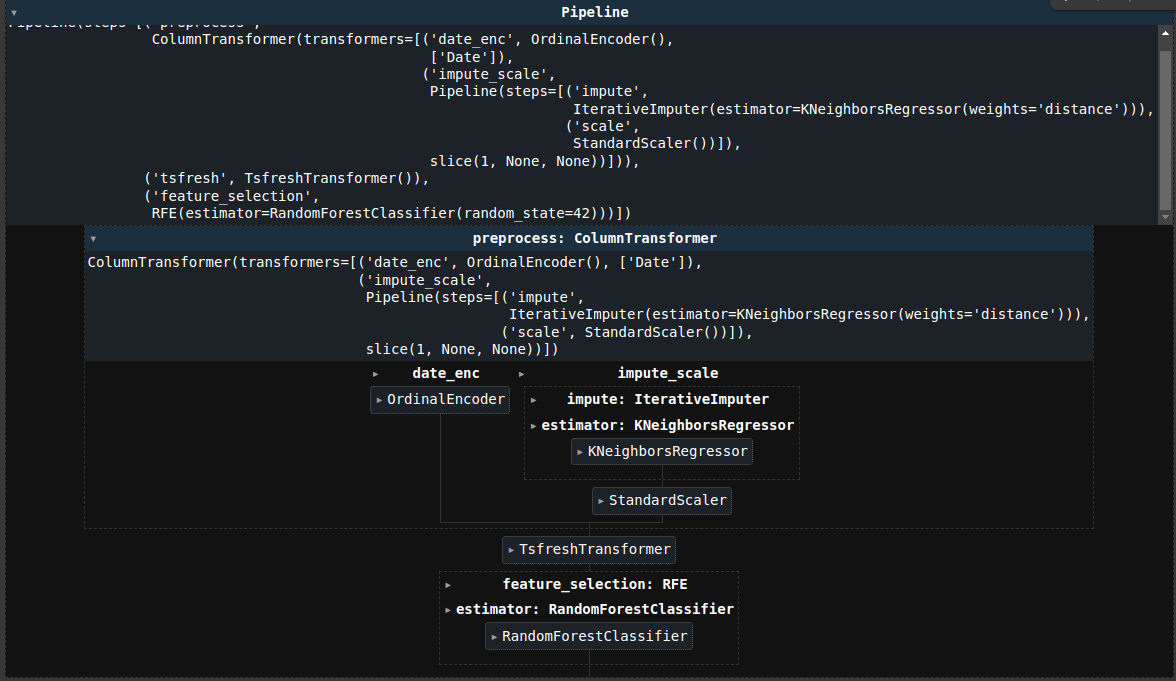
En iyi modeli tüm veri seti üzerinde eğitip kayıtını yaptım. Daha sonrasında bu modeli emlak şirketleri üzerinde test ettim.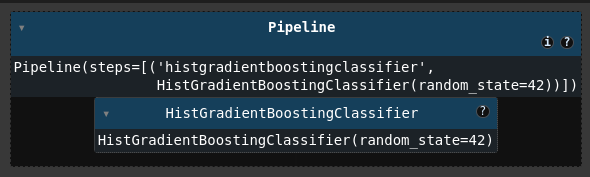


Sektörel benzerlik çıktısı, burada bir şirketin hangi sektöre benzediği baz alınmıştır. Burada birden fazla şirketin de test veri setine verilip daha sonrasında çıktılarının ortalaması alınarak sektörel benzerlik yapılması mümkün
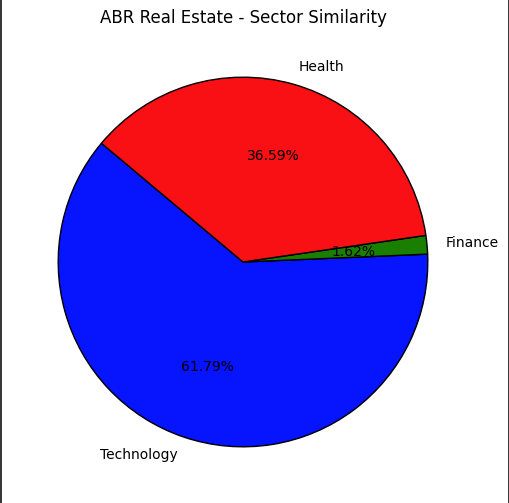